In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
df = pandas.read_csv("results/reannotated_allfusions_binmx.tsv", sep="\t", index_col=0)
df.columns = df.columns.map(lambda x:x.replace(".", "|"))

In [8]:
samples = list(set(i.split("|")[0] for i in df.columns if i not in ['fusion_key', 'fusion_id']))

In [9]:
entries = list(set(i.split("|")[1] for i in df.columns if i not in ['fusion_key', 'fusion_id']))
entries.remove("truth")

In [10]:
for i in entries:
    if "giab|"+i in df:
        print(i, sum(df["giab|"+i]))

7378934 32
8071387 147
8644608 34
8281648 16
7488045 207
8114525 7
9610272 15
7185743 24
9609147 9
9610021 25
7997358 198
7269246 200
9609148 9
8040408 170


In [11]:
counts = {}
counts_giab = {}
for i in entries:
    o = []
    for j in samples:
        if j != "giab":
            key = j + "|" + i
            if key in df:
                o.append(sum(df[key]))
    if "giab|"+i in df:
        counts_giab[i] = sum(df["giab|"+i])
    counts[i] = o

In [12]:
entries_sorted = sorted(entries, key=lambda x: np.mean(counts[x]) if len(counts[x]) else 0)

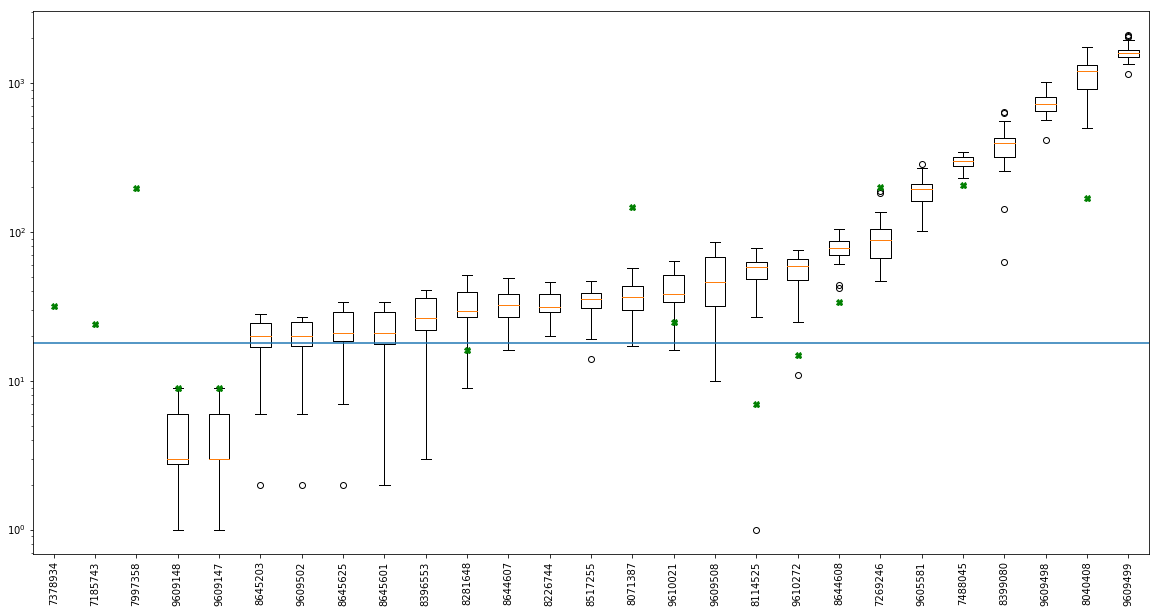

In [13]:
plt.figure(figsize=(20,10))
plt.boxplot( list(counts[i] for i in entries_sorted), labels=entries_sorted )
plt.plot([None]+list(counts_giab.get(i, None) for i in entries_sorted), "gX")
plt.plot([18]*(len(entries_sorted)+2))
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

In [14]:
[None]+list(counts_giab.get(i, None) for i in entries)

[None,
 32,
 147,
 None,
 None,
 34,
 None,
 16,
 None,
 207,
 7,
 15,
 None,
 24,
 None,
 None,
 9,
 25,
 None,
 198,
 None,
 None,
 None,
 None,
 200,
 9,
 None,
 170]

In [15]:
s1 = pandas.Series( dict( (i.split("|")[1], sum(df[i])) for i in df.columns if i.startswith("LNCapFGC_3|")) )

In [16]:
s2 = pandas.Series( dict( (i.split("|")[1], sum(df[i])) for i in df.columns if i.startswith("HCC1143_2|")) )

In [17]:
isect = s1.index.intersection(s2.index)

In [18]:
np.corrcoef(s1[isect], s2[isect])

array([[1.        , 0.97713322],
       [0.97713322, 1.        ]])

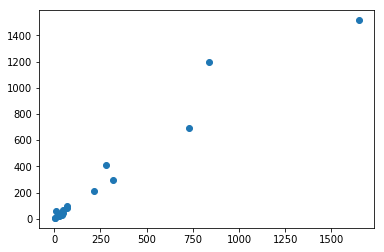

In [19]:
plt.scatter(s1[isect], s2[isect])

In [20]:
list(i for i in samples if i.startswith("A549"))

['A549_2', 'A549_3', 'A549_5', 'A549_4', 'A549_1']

In [21]:
cols = list(i for i in df.columns if i.startswith("A549_") and not i.endswith("truth"))

In [22]:
sum(df[cols].apply(sum, 1) > 5)

227

In [27]:
c = []
for i in entries:
    k = "giab|"+i
    if k in df:
        c.append(k)
giabDF = df[c]

In [32]:
giabDF[ giabDF.sum(axis=1) > 0].sum(axis=1).sort_values()

chr10_101476095_101476116_-_chr11_78282479_78282500_-      1
chr2_61417759_61417780_-_chr17_12907360_12907381_-         1
chr2_61505290_61505311_-_chr5_167915597_167915618_+        1
chr2_62998517_62998538_+_chr2_62449337_62449358_+          1
chr2_71300206_71300227_+_chr11_118897417_118897438_-       1
chr2_71654377_71654398_+_chr17_61910434_61910455_-         1
chr2_73613309_73613330_+_chr2_71337241_71337262_-          1
chr2_74717809_74717830_+_chr8_48749781_48749802_-          1
chr2_89165120_89165141_-_chr2_89197454_89197475_+          1
chr2_89185125_89185146_+_chr14_106725706_106725727_-       1
chr2_89185624_89185645_+_chr7_5567494_5567515_-            1
chr2_55462043_55462064_+_chr17_16284450_16284471_+         1
chr2_89185624_89185645_+_chr7_5567666_5567687_-            1
chr2_89185624_89185645_+_chr7_5568085_5568106_-            1
chr2_89185624_89185645_+_chr7_5568107_5568128_-            1
chr2_89185624_89185645_+_chr7_5568134_5568155_-            1
chr2_89185624_89185645_+

In [35]:
giabDF[ giabDF.sum(axis=1) > 2].sum(axis=1).sort_values()

chr14_106725598_106725619_-_chr14_106311999_106312020_-    3
chr20_43595233_43595254_+_chr6_90097298_90097319_-         3
chr1_24979108_24979129_+_chr17_79477848_79477869_-         4
chr20_43653760_43653781_+_chr20_43530161_43530182_+        4
chr15_57544493_57544514_+_chr5_149786510_149786531_-       4
chr17_44171915_44171936_-_chr17_44648224_44648245_-        4
chr18_51686124_51686145_-_chr20_35927156_35927177_+        4
chr1_28834661_28834682_+_chr11_10822623_10822644_-         4
chr1_181003199_181003220_+_chr12_15103647_15103668_-       4
chr5_97006377_97006398_+_chr5_97217123_97217144_+          5
chr2_89521169_89521190_-_chr2_89160106_89160127_-          5
chr22_22712597_22712618_+_chr22_23247158_23247179_+        5
chr22_22550628_22550649_+_chr22_23261696_23261717_+        5
chr1_28834661_28834682_+_chr21_34939452_34939473_+         5
chr11_8708366_8708387_+_chr7_5566968_5566989_-             5
chr14_106552673_106552694_-_chr14_106322311_106322332_-    5
chr14_106552673_10655269

In [37]:
giabDF.shape

(80880, 14)